In [304]:
import pandas as pd
import numpy as np
import datetime as dt
from util import get_data, plot_data
import matplotlib.pyplot as plt



In [331]:
print pd.__version__
end_date = "31-12-2009"
start_date = "01-01-2007"
stocks = ["JPM"]

adj_close = get_data(stocks, pd.date_range(start_date, end_date))
adj_close.fillna(method='ffill', inplace=True)
adj_close.fillna(method='bfill', inplace=True)
# print adj_close

0.20.3


In [332]:
jpm = adj_close.ix[:, ["JPM"]]
rm_jpm = pd.rolling_mean(adj_close["JPM"], window=20)
rm_150_jpm = pd.rolling_mean(adj_close["JPM"], window=150)
rstd_jpm = pd.rolling_std(adj_close["JPM"], window=20)


/home/okazkayasi/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/home/okazkayasi/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  
/home/okazkayasi/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=150,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until
/home/okazkayasi/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: Fu

In [333]:
def get_bollinger_bands(rm, rstd):
    upper_band = rm + 2*rstd
    lower_band = rm - 2*rstd

    return upper_band, lower_band

In [334]:
upper_band, lower_band = get_bollinger_bands(rm_jpm, rstd_jpm)


In [347]:
type(jp)

pandas.core.series.Series

In [343]:
jp = adj_close["JPM"]['2008-01-01':]
up = upper_band['2008-01-01':]
low = lower_band['2008-01-01':]


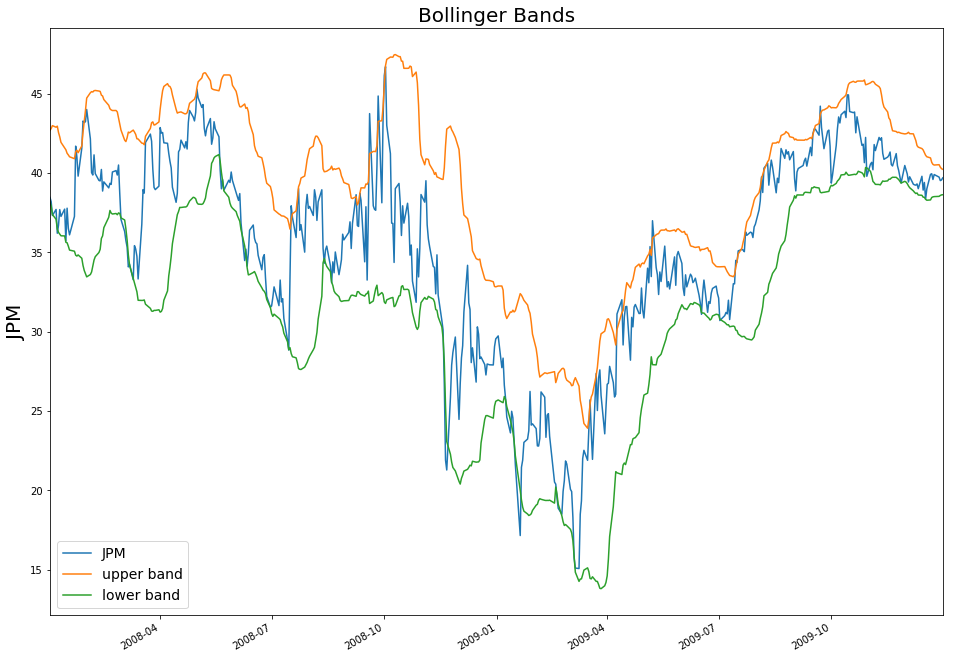

In [402]:
ax = jp.plot()
plt.title("Bollinger Bands", fontsize = 20)
plt.ylabel("JPM", fontsize = 20)
plt.rcParams["figure.figsize"] = (16,12)
up.plot(label='upper band', ax=ax)
low.plot(label='lower band', ax=ax)
plt.legend(fontsize=14)
plt.savefig('Bollinger Bands.png', dpi=100)
plt.show()


In [348]:
# stochastic
jpm['highest 14'] = pd.rolling_max(jpm["JPM"], window=14)
jpm['lowest 14'] = pd.rolling_min(jpm["JPM"], window=14)
K = (jpm["JPM"] - jpm["lowest 14"])/ (jpm['highest 14'] - jpm['lowest 14']) * 100
slow_stoch = pd.rolling_mean(K, window=3)

/home/okazkayasi/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.rolling_max is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=14,center=False).max()
  
/home/okazkayasi/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_min is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=14,center=False).min()
  This is separate from the ipykernel package so we can avoid doing imports until
/home/okazkayasi/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=3,center=False).mean()
  """


In [351]:
slow_stoch_2008 = slow_stoch['2008-01-01':]

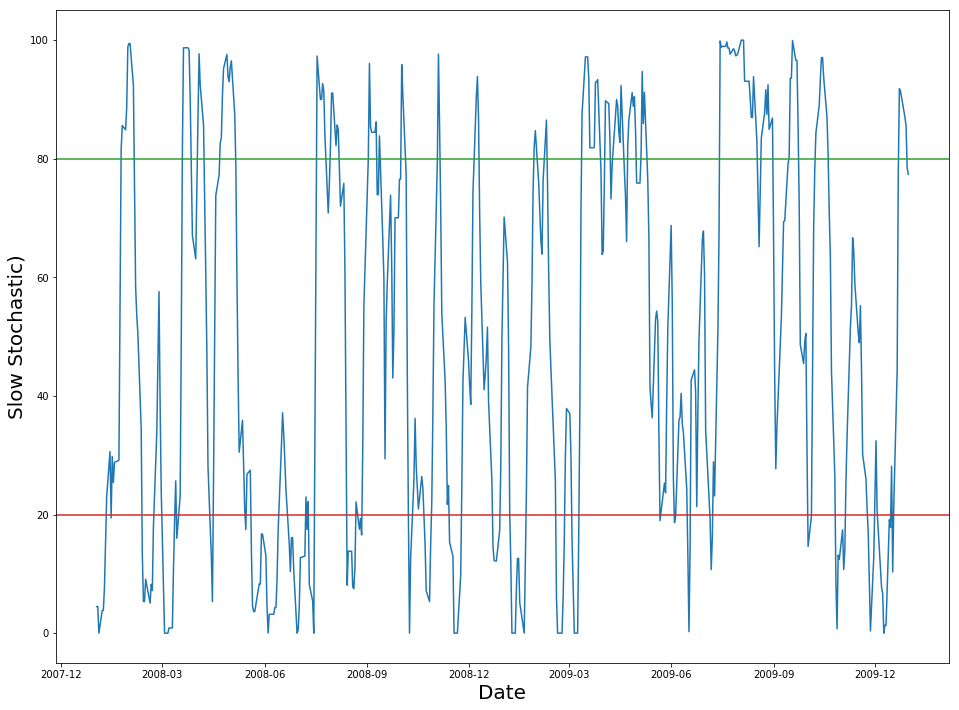

In [406]:
fig,ax1 = plt.subplots()
# ax1.plot(slow_stoch)
# ax1.title('Slow Stochastic', fontsize=20)
ax1.set_xlabel('Date', fontsize=20)
ax1.set_ylabel('Slow Stochastic)', fontsize=20)
ax1.plot(slow_stoch_2008)
plt.axhline(20, color='tab:red')
plt.axhline(80, color='tab:green')
fig.savefig('Slow Stochastic.png', dpi=100)

In [355]:
JP = jpm[['JPM']]
JP['150-SMA'] = rm_150_jpm
JP['20-SMA'] = rm_jpm
JP

JPM    150-SMA   20-SMA
2007-01-03  42.48        NaN      NaN
2007-01-04  42.59        NaN      NaN
2007-01-05  42.23        NaN      NaN
2007-01-08  42.37        NaN      NaN
2007-01-09  42.20        NaN      NaN
2007-01-10  42.51        NaN      NaN
2007-01-11  42.69        NaN      NaN
2007-01-12  42.41        NaN      NaN
2007-01-16  42.76        NaN      NaN
2007-01-17  42.80        NaN      NaN
2007-01-18  42.55        NaN      NaN
2007-01-19  43.09        NaN      NaN
2007-01-22  43.89        NaN      NaN
2007-01-23  44.04        NaN      NaN
2007-01-24  44.50        NaN      NaN
2007-01-25  44.37        NaN      NaN
2007-01-26  43.92        NaN      NaN
2007-01-29  43.72        NaN      NaN
2007-01-30  44.35        NaN      NaN
2007-01-31  45.01        NaN  43.2240
2007-02-01  45.26        NaN  43.3630
2007-02-02  45.01        NaN  43.4840
2007-02-05  45.03        NaN  43.6240
2007-02-06  45.07        NaN  43.7590
2007-02-07  45.26        NaN  43.9120
2007-02-08  45.01        NaN  44.0370
2007-02-09  44.56        NaN  44.1305
2007-02-12  44.58        NaN  44.2390
2007-02-13  45.03        NaN  44.3525
2007-02-14  45.44        NaN  44.4845
...           ...        ...      ...
2009-11-18  41.33  37.426000  41.4870
2009-11-19  40.54  37.508200  41.3365
2009-11-20  40.45  37.571800  41.2045
2009-11-23  41.23  37.644600  41.1785
2009-11-24  40.47  37.704000  41.1110
2009-11-25  40.17  37.760333  41.0865
2009-11-27  39.38  37.815200  40.9430
2009-11-30  40.48  37.877333  40.9770
2009-12-01  40.22  37.927067  40.9595
2009-12-02  39.95  37.984333  40.9230
2009-12-03  39.44  38.041467  40.8845
2009-12-04  39.77  38.079867  40.7830
2009-12-07  39.30  38.121267  40.6770
2009-12-08  39.26  38.147200  40.5275
2009-12-09  39.24  38.185600  40.3855
2009-12-10  39.32  38.201067  40.2400
2009-12-11  39.02  38.234200  40.1285
2009-12-14  39.80  38.275533  40.0750
2009-12-15  38.93  38.319400  39.9710
2009-12-16  39.41  38.357000  39.8855
2009-12-17  38.37  38.391667  39.7375
2009-12-18  39.01  38.415733  39.6610
2009-12-21  39.92  38.455000  39.6345
2009-12-22  39.96  38.502533  39.5710
2009-12-23  39.60  38.545467  39.5275
2009-12-24  39.91  38.593533  39.5145
2009-12-28  39.75  38.627067  39.5330
2009-12-29  39.53  38.671067  39.4855
2009-12-30  39.57  38.702733  39.4530
2009-12-31  39.70  38.733667  39.4405

[756 rows x 3 columns]

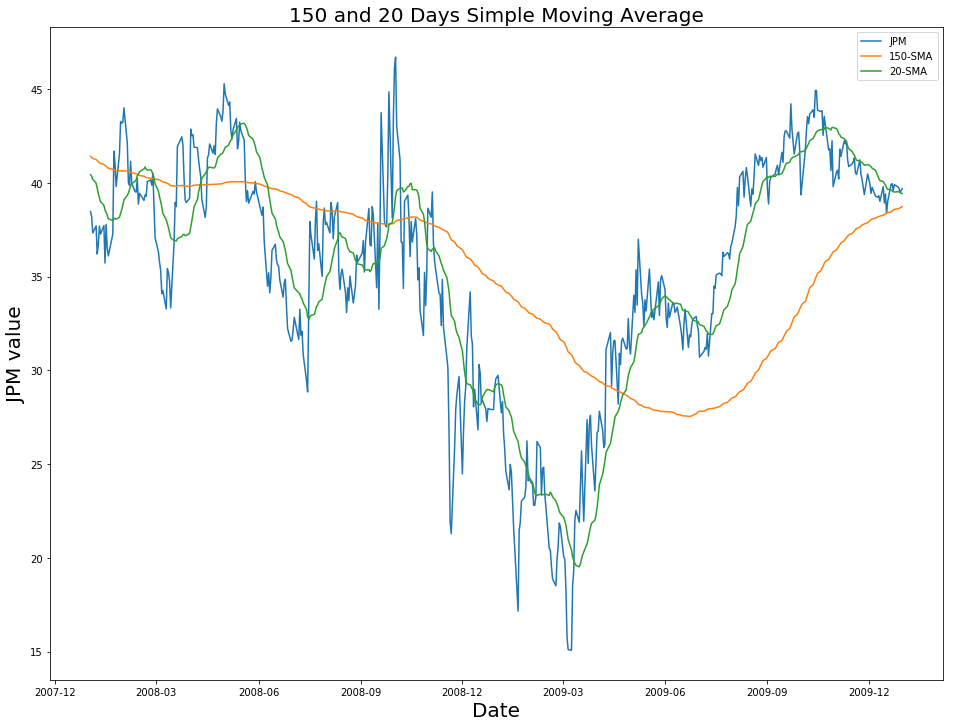

In [408]:
JP_2008 = JP['2008-01-01':]
plt.title('150 and 20 Days Simple Moving Average', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('JPM value', fontsize=20)
plt.plot(JP_2008['JPM'], label='JPM')
plt.plot(JP_2008['150-SMA'], label='150-SMA')
plt.plot(JP_2008['20-SMA'], label='20-SMA')
plt.legend()
plt.savefig('Moving Averages.png', dpi=100)


In [367]:
e = 12
rm_jpm_1 = pd.rolling_mean(adj_close["JPM"], window=e)
ema_12 = np.zeros(len(rm_jpm_1.index))
multiplier = 2./(e+1)
ema_12[e-1] = rm_ten_jpm[e-1]
for i in range(e, len(jpm.index)):
    close = jpm["JPM"].values[i]
    em = ema_12[i-1]
    ema_12[i] = (close - em) * multiplier + em

/home/okazkayasi/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  


In [369]:
e = 26
rm_jpm_1 = pd.rolling_mean(adj_close["JPM"], window=e)
ema_26 = np.zeros(len(rm_jpm_1.index))
multiplier = 2./(e+1)
ema_26[e-1] = rm_ten_jpm[e-1]
for i in range(e, len(jpm.index)):
    close = jpm["JPM"].values[i]
    em = ema_26[i-1]
    ema_26[i] = (close - em) * multiplier + em

/home/okazkayasi/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=26,center=False).mean()
  


In [ ]:
df_macd = pd.DataFrame(rm_jpm_1)
df_macd['ema_12'] = ema_12
df_macd['ema_26'] = ema_26
df_macd['MACD'] = df_macd['ema_12'] - df_macd['ema_26']
df_macd

In [373]:
MACD = ema_12 - ema_26
MACD[:25] = 0


In [374]:
# signal_line
e = 9
rm_macd = pd.rolling_mean(MACD, window=e)
sig = np.zeros(len(MACD))
multiplier = 2./(e+1)
sig[e-1] = rm_macd[e-1]
for i in range(e, len(MACD)):
    close = MACD[i]
    em = sig[i-1]
    sig[i] = (close - em) * multiplier + em


/home/okazkayasi/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


In [376]:
df_macd['signal'] = sig
df_macd['hist'] = df_macd['MACD'] - df_macd['signal']
df_macd

JPM     ema_12     ema_26       MACD    signal       hist
2007-01-03        NaN   0.000000   0.000000   0.000000  0.000000   0.000000
2007-01-04        NaN   0.000000   0.000000   0.000000  0.000000   0.000000
2007-01-05        NaN   0.000000   0.000000   0.000000  0.000000   0.000000
2007-01-08        NaN   0.000000   0.000000   0.000000  0.000000   0.000000
2007-01-09        NaN   0.000000   0.000000   0.000000  0.000000   0.000000
2007-01-10        NaN   0.000000   0.000000   0.000000  0.000000   0.000000
2007-01-11        NaN   0.000000   0.000000   0.000000  0.000000   0.000000
2007-01-12        NaN   0.000000   0.000000   0.000000  0.000000   0.000000
2007-01-16        NaN   0.000000   0.000000   0.000000  0.000000   0.000000
2007-01-17        NaN   0.000000   0.000000   0.000000  0.000000   0.000000
2007-01-18        NaN   0.000000   0.000000   0.000000  0.000000   0.000000
2007-01-19        NaN  37.071000   0.000000  37.071000  0.000000  37.071000
2007-01-22        NaN  38.120077   0.000000  38.120077  0.000000  38.120077
2007-01-23        NaN  39.030834   0.000000  39.030834  0.000000  39.030834
2007-01-24        NaN  39.872244   0.000000  39.872244  0.000000  39.872244
2007-01-25        NaN  40.564207   0.000000  40.564207  0.000000  40.564207
2007-01-26        NaN  41.080483   0.000000  41.080483  0.000000  41.080483
2007-01-29        NaN  41.486562   0.000000  41.486562  0.000000  41.486562
2007-01-30        NaN  41.927091   0.000000  41.927091  0.000000  41.927091
2007-01-31        NaN  42.401385   0.000000  42.401385  0.000000  42.401385
2007-02-01        NaN  42.841172   0.000000  42.841172  0.000000  42.841172
2007-02-02        NaN  43.174838   0.000000  43.174838  0.000000  43.174838
2007-02-05        NaN  43.460247   0.000000  43.460247  0.000000  43.460247
2007-02-06        NaN  43.707902   0.000000  43.707902  0.000000  43.707902
2007-02-07        NaN  43.946686   0.000000  43.946686  0.000000  43.946686
2007-02-08  43.658462  44.110273  41.832000   2.278273  0.455655   1.822618
2007-02-09  43.738462  44.179462  42.034074   2.145387  0.793601   1.351786
2007-02-12  43.815000  44.241083  42.222661   2.018422  1.038565   0.979856
2007-02-13  43.922692  44.362455  42.430612   1.931842  1.217221   0.714622
2007-02-14  44.040769  44.528231  42.653530   1.874701  1.348717   0.525984
...               ...        ...        ...        ...       ...        ...
2009-11-18  42.064615  41.408678  41.679036  -0.270359 -0.241804  -0.028555
2009-11-19  41.895769  41.275035  41.594663  -0.319628 -0.257369  -0.062260
2009-11-20  41.723462  41.148107  41.509874  -0.361767 -0.278248  -0.083519
2009-11-23  41.621538  41.160706  41.489142  -0.328437 -0.288286  -0.040151
2009-11-24  41.493077  41.054443  41.413650  -0.359207 -0.302470  -0.056737
2009-11-25  41.351538  40.918375  41.321528  -0.403153 -0.322607  -0.080546
2009-11-27  41.230000  40.681702  41.177711  -0.496009 -0.357287  -0.138722
2009-11-30  41.111923  40.650671  41.126029  -0.475358 -0.380901  -0.094457
2009-12-01  41.001538  40.584414  41.058915  -0.474502 -0.399621  -0.074880
2009-12-02  40.932308  40.486812  40.976774  -0.489962 -0.417690  -0.072272
2009-12-03  40.840769  40.325764  40.862939  -0.537175 -0.441587  -0.095588
2009-12-04  40.806538  40.240262  40.781980  -0.541719 -0.461613  -0.080106
2009-12-07  40.693077  40.095606  40.672204  -0.576598 -0.484610  -0.091988
2009-12-08  40.672308  39.967051  40.567596  -0.600545 -0.507797  -0.092748
2009-12-09  40.621154  39.855197  40.469256  -0.614058 -0.529049  -0.085009
2009-12-10  40.568846  39.772859  40.384126  -0.611266 -0.545493  -0.065774
2009-12-11  40.523077  39.657035  40.283079  -0.626045 -0.561603  -0.064442
2009-12-14  40.446154  39.679029  40.247296  -0.568266 -0.562936  -0.005331
2009-12-15  40.350385  39.563794  40.149718  -0.585924 -0.567533  -0.018391
2009-12-16  40.241154  39.540133  40.094924  -0.554791 -0.564985   0.010194
2009-12-17  40.098462  39.360113  39.967152  -0.607039 -0.573396  

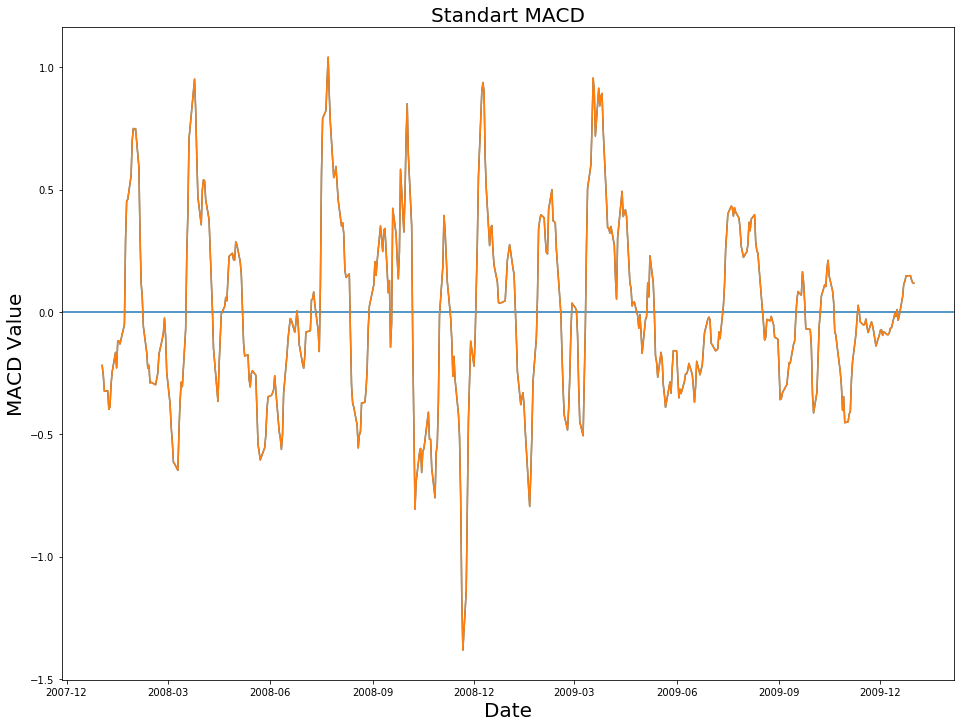

In [409]:
hist = df_macd['hist']
hist = hist['2008-01-01':]

plt.title('Standart MACD', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('MACD Value', fontsize=20)
plt.plot(hist)
plt.axhline(0)

plt.plot(hist)
plt.savefig('MACD Histogram.png', dpi=100)